In [31]:
import pandas as pd


train = pd.read_csv('/aiffel/data/data/bike-sharing-demand/train.csv')

# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초를 포함하는 6가지 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 결과 출력
print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

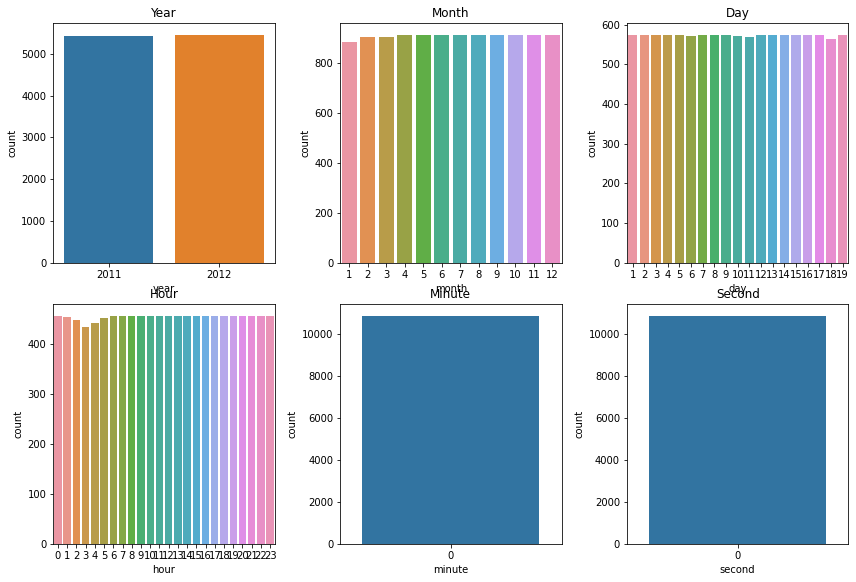

In [77]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
sns.countplot(x='year', data=train, ax=axes[0, 0])
sns.countplot(x='month', data=train, ax=axes[0, 1])
sns.countplot(x='day', data=train, ax=axes[0, 2])
sns.countplot(x='hour', data=train, ax=axes[1, 0])
sns.countplot(x='minute', data=train, ax=axes[1, 1])
sns.countplot(x='second', data=train, ax=axes[1, 2])


plt.tight_layout()
axes[0, 0].set_title('Year')
axes[0, 1].set_title('Month')
axes[0, 2].set_title('Day')
axes[1, 0].set_title('Hour')
axes[1, 1].set_title('Minute')
axes[1, 2].set_title('Second')

plt.show()

In [105]:
X = train[['year', 'month', 'day', 'hour', 'season', 'workingday', 'holiday', 'weather', 'temp', 'humidity']].values
y = train['count'].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [113]:
model.fit(X_train, y_train)

LinearRegression()

In [114]:
predictions = model.predict(X_test)
predictions

array([243.938436  ,  49.06955941, 207.84499101, ..., 305.83755265,
        40.07789828, 242.40528795])

In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 19985.171918721586
Root Mean Squared Error (RMSE): 141.3689213325248


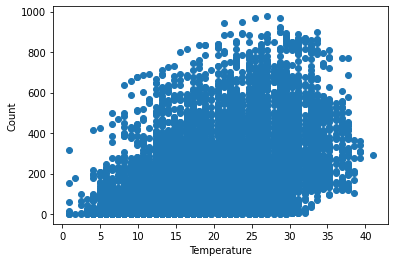

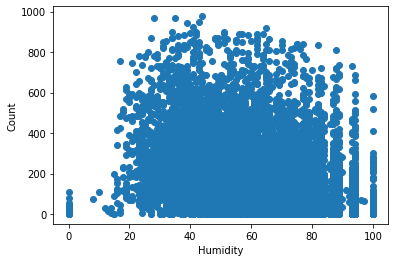

In [116]:
plt.scatter(train['temp'], train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

plt.scatter(train['humidity'], train['count'])
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()